In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [3]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


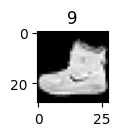

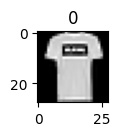

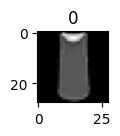

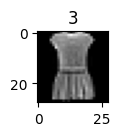

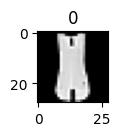

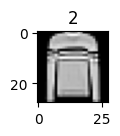

In [4]:

for i in range(6):
  plt.subplot(1,6,i+1)
  plt.imshow(X_train[i],cmap='gray')
  plt.title(Y_train[i])
  plt.show()

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [8]:
model_3=LogisticRegression(max_iter=100,C=0.01,solver='lbfgs',warm_start=True,n_jobs=-1)



In [9]:
from sklearn.metrics import classification_report, accuracy_score, log_loss
import time
start=time.time()
epoch =10
e=[]
a=[]
l=[]
for i in range(epoch):
  model_3.fit(X_train,Y_train)
  y_pred=model_3.predict(X_test)
  e.append(i+1)
  acc=accuracy_score(Y_test,y_pred)
  a.append(acc)
  y_pred_proba = model_3.predict_proba(X_test)
  loss = log_loss(Y_test, y_pred_proba)
  l.append(loss)
  print('accuracy_score={}'.format(acc))
end=time.time()
time_taken=end-start
print('time_taken={}'.format(time_taken))
print('accuracy_score={}'.format(acc))

accuracy_score=0.8449
accuracy_score=0.8467
accuracy_score=0.8456
accuracy_score=0.8473
accuracy_score=0.8466
accuracy_score=0.8474
accuracy_score=0.8466
accuracy_score=0.8469
accuracy_score=0.8469
accuracy_score=0.8469
time_taken=225.7141468524933
accuracy_score=0.8469


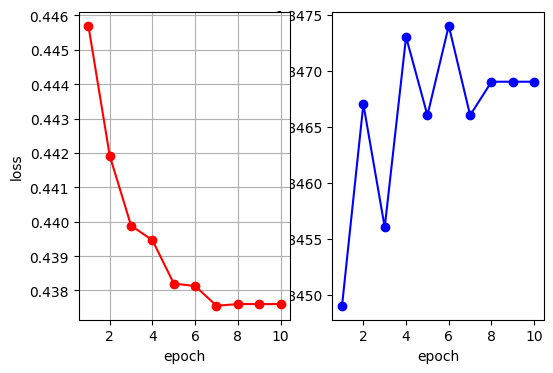

In [10]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,2)
plt.plot(e,a,color='blue',marker='o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.subplot(1,2,1)
plt.plot(e,l,color='red',marker='o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

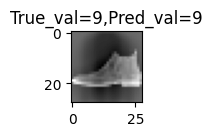

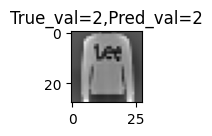

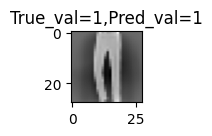

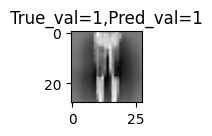

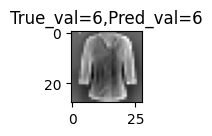

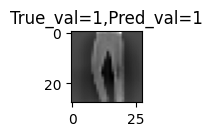

In [11]:
for i in range(6):
  plt.subplot(1,6,i+1)
  img=X_test[i].reshape(28,28)
  plt.imshow(img,cmap='gray')
  plt.title('True_val={},Pred_val={}'.format(Y_test[i],y_pred[i]))
  plt.show()


In [13]:
cm=confusion_matrix(Y_test, y_pred)
print( cm)

[[815   1  13  51   5   1 100   1  12   1]
 [  3 956   3  27   6   0   3   0   2   0]
 [ 23   5 740  11 125   1  85   1   9   0]
 [ 23  12  14 876  30   1  38   0   6   0]
 [  0   1 109  37 765   0  80   0   8   0]
 [  1   0   0   1   0 924   0  48   5  21]
 [138   3 122  38 109   1 568   0  21   0]
 [  0   0   0   0   0  30   0 942   0  28]
 [  5   1   6  11   2   4  24   5 941   1]
 [  0   0   0   0   0  14   1  43   0 942]]


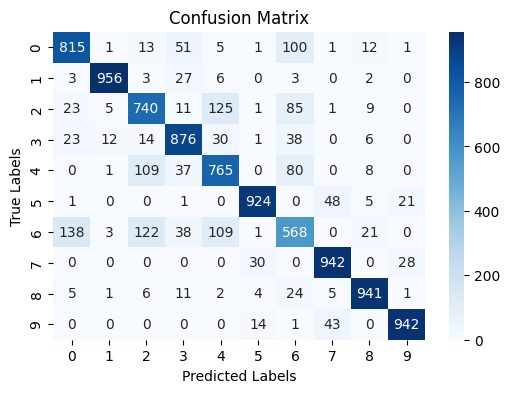

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()